#**Demo: Statistical Foundations I**

## **Part 1: Why Statistical Analysis is required?**

###**Importing Required Libraries**

In [ ]:
#Importing Required Libraries

import pandas as pd
import numpy as np

In [ ]:
!wget https://www.dropbox.com/s/755hnawo000aeaw/Placement_Data_Full_Class.csv

### **Understanding the importance of Statistical Analysis**

In [ ]:
campus = pd.read_csv('Placement_Data_Full_Class.csv')
campus.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
campus.shape

(215, 15)

**Onservation:**
The dataset consists of 215 rows and 15 columns. They represent placement information of students along with their educational history.


> **That's all we can tell by looking at this raw data**


> We cannot make any useful observations from this data such as any of the below:

*- Are the students with first class (above 60%) in Degree more likely to be placed?*

*- Do any of the other scores play a significant role in a student getting placed?*

*- Is any specific branch being favored by companies during placement?*

**Let's create a simple pivot table from this data-**

In [ ]:
campus.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
pt = pd.crosstab(campus['status'], campus['specialisation'], normalize= 'index').round(4)*100
pt

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,37.31,62.69
Placed,64.19,35.81


In [ ]:
pd.crosstab(campus["status"], campus["specialisation"], normalize = "index").round(4)

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,0.3731,0.6269
Placed,0.6419,0.3581


In [ ]:
pd.crosstab(campus["status"], campus["specialisation"])

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,25,42
Placed,95,53


In [ ]:
pd.crosstab(campus["status"], campus["specialisation"], normalize = "columns")

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,0.208333,0.442105
Placed,0.791667,0.557895


In [ ]:
pd.crosstab(campus["status"], campus["specialisation"], normalize = "all") # 0 to 1

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,0.116279,0.195349
Placed,0.441860,0.246512


In [ ]:
campus[(campus["status"] == "Not Placed") & (campus["specialisation"] == "Mkt&Fin")]

In [ ]:
temp_df = campus[(campus["status"] == "Not Placed") & (campus["specialisation"] == "Mkt&Fin")]
temp_df.shape

(25, 15)

**Observation:**The % of placement is much higher in Mkt&Fin (64%) as compared to Mkt&HR (36%)

**Insight:** The BFSI sector is booming and the jobs related to that field are in more demand

**Business Benefit:** The educational institute can plan to increase its intake of students for Mkt&Fin field


> **Here, Pivot Table is a type of Statistical Analysis performed on the data which resulted in gettng some useful information from the otherwise unvaluable data.**

> **_This is the importance of Statistical Analysis in Businesses._**



In [ ]:
campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## **Part 2: Measures of Central Tendency**

The online sector, referred to as “clicks,” has been slowly eating up market share in the past two decades.

E-commerce platform allows people to buy products from books, toys, clothes, and shoes to food, furniture, and other household items.

ABOUT THE DATA

This is a data set of US superstore from 2014-2018

Let us understand the attributes of this data set:

1. 'Row ID' - This is nothing but Serial No.
2. 'Order ID' - ID created when a product order is placed.
3. 'Order Date' - Date on which a customer places his/her order.
4. 'Ship Date' - Date on which the order is shipped.
5. 'Ship Mode' - Mode of shipment of each order.
6. 'Customer ID' - ID assigned to each customer who places an order.
7. 'Customer Name' - Name of Customer.
8. 'Segment' - Section from where the order is placed.
9. 'Country' - Country details of this data set. We are looking only for US store data.
10. 'City' - Cities of US are listed here.
11. 'State' - States of US are listed here.
12. 'Postal Code' - pin code
13. 'Region' - grouped into region wise
14. 'Product ID' - Product ID of each product
15. 'Category' - Category to which each product belongs to.
16. 'Sub-Category' - Sub-Category of each Category
17. 'Product Name' - Name of products.
18. 'Sales' - Selling Price of each product.
19. 'Quantity' - number of quantity available for a particular product.
20. 'Discount' - Discount available on each product.
21. 'Profit' - Profit gained on each product.



###**Tasks to be Performed:**

- What is the average sales of products between the year 2014 and 2018 and, also find the average amount of products purchased by customers?
- What is the median profit gained between the years 2014 and 2018?
- Find out the most sold product in the US




###**Downloading the dataset from the Dropbox**

In [ ]:
#Downloading the Dataset from the Dropbox

!wget https://www.dropbox.com/s/9tt6z9705abpjnm/US%20Superstore%20data.csv

--2022-02-13 17:24:45--  https://www.dropbox.com/s/9tt6z9705abpjnm/US%20Superstore%20data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9tt6z9705abpjnm/US%20Superstore%20data.csv [following]
--2022-02-13 17:24:46--  https://www.dropbox.com/s/raw/9tt6z9705abpjnm/US%20Superstore%20data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2d9fed3c9c63365a668f13c337.dl.dropboxusercontent.com/cd/0/inline/BfoAEa6qSJJBxfPx6-37fwYOOdpZ4SQOqLEGVySYbEC7nj_oz3AN2l0lnsgU-MkfeqiakWjmIuWZq2Rg3zikr4ih2kYLuiX_MT8edDpzEf9Dz97hdiUjYQSbJZ5uqzoqeCom2tRwIR-8RrlskwGj9R8I/file# [following]
--2022-02-13 17:24:46--  https://uc2d9fed3c9c63365a668f13c337.dl.dropboxusercontent.com/cd/0/inline/BfoAEa6qSJJBxfPx6-37fwYOOdpZ4SQOqLEGVySYbEC7nj_o

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('US Superstore data.csv')
df.head(10)

UnicodeDecodeError: ignored

###**Measures of Central Tendency**

####**Task 1:**
What is the average sales of products between the year 2014 and 2018 and, also find the average amount of products purchased by customers?

**Mean**

In [ ]:
df[['Quantity','Sales']].mean()

In [ ]:
#Using method from Numpy
np.mean(df.Quantity)

In [ ]:
#Find mean after per state
df.groupby("State")[['Quantity','Sales']].mean()

In [ ]:
df.groupby("Country")["State"].value_counts(normalize=True)
# crosstab

In [ ]:
#Find mean after per state
df.groupby("State").mean()[['Quantity','Sales']]

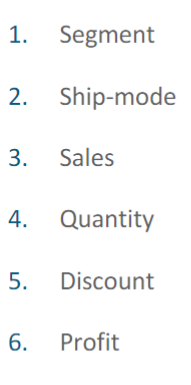

In [ ]:
df

####**Task 2:**
What is the median profit gained between the years 2014 and 2018?

**Median**

In [ ]:
df['Profit'].median()

In [ ]:
#Using method from Numpy
np.median(df.Profit)

####**Task 3:**

Find out the most sold product in the US

**Mode**

In [ ]:
df['Product Name'].mode()

###**Mean Vs. Median Vs. Mode**

####**Dataset Description**

The data set consists of Placement data of students in a Riverview Engineering College. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students. 

Perform Descriptive Statistics on it to extract useful insights

In [ ]:
!wget https://www.dropbox.com/s/755hnawo000aeaw/Placement_Data_Full_Class.csv

In [ ]:
campus = pd.read_csv('Placement_Data_Full_Class.csv.1')
campus.tail()

In [ ]:
campus['salary'].mean()

___
**Observations:**
- The average salary offered to students in Riverview Engineering College is **5,04,743** (5 lacs approx.) 
___

In [ ]:
campus['salary'].median()

___
**Observations:**
- The median salary is **2,65,000** (2 lac & 65 thousand), which is quite less than the average salary offered to students
- From this, we can understand how calculating average can be misleading 
- We can assume that this is happening because there are outliers in the dataset, which means that **one or two students in the college have been offered a salary much greater than the average students**, which is quite common in every college.
___

Let us check the maximum salary offered to verify our assumption

In [ ]:
campus['salary'].max()

___
**Observations:**
- From above, you can see that the maximum salary offered to a student is **10,000,000** (1 Crore or 10 Million)
- This is because the average salary is much more than the median salary offered
___

In [ ]:
campus['salary'].mode()

___
**Observation:**
- From above, we can see that the most of the students received a salary of about **3,00,000** (3 lac)
___

##**Part 3: Data Types**



###**Qualitative Data & Quantitative Data**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

sns.barplot(x = 'Region', y = 'Sales', data = df, ci = None)
plt.xlabel('Region: A Qualitative Data')
plt.ylabel('Sales: Quantitative Data')

plt.show()

In [ ]:
df.groupby("Region")["Sales"].mean()

**Observation:** 


*   Data represented in the form of Categories (X-axis) - Qualitative Data
*   Data represented using continuous numrical values (Y-axis) - Quantitative Data




###**Qualitative Data**
- Nominal
- Ordinal    


####**Nominal Data**

In [ ]:
df_new = pd.DataFrame(df['Sub-Category'])
df_new.head()

**Observation:** Distinct types of furniture such as *Chairs* or *Tables*, hence Nominal Data.

####**Ordinal Data**

In [ ]:
df_new = pd.DataFrame(df[['Customer ID', 'Ship Mode']])
df_new.head()

**Observation:** Distinct types of shipment methods which can be oredered on the basis of priority, hence Ordinal Data.

###**Quantitative Data**
- Discrete
- Continuous   


####**Discrete Data**

In [ ]:
df_new = pd.DataFrame(df[['Customer Name','Quantity']])
df_new.sample(5)

**Observation:** Distinct numerical values of Quantity such as *2*, *5*, etc. in a finite range, hence Discrete Data.

####**Continuous Data**

In [ ]:
df_new = pd.DataFrame(df[['Customer Name','Sales']])
df_new.sample(5)

**Observation:** Any real value for Sales, hence Continuous Data.

In [ ]:
df.head()

In [ ]:
# How can i get the unique values from column - Shipping
# 
df['Ship Mode'].unique()

In [ ]:
set(df["Ship Mode"])

##**Why Learn Statistics?**

- Important for [Data Science Interviews](https://www.edureka.co/blog/interview-questions/data-science-interview-questions/#statistics)
- It's a fundamental concept
- Your basics must be clear before going on advanced topics